<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement---1" data-toc-modified-id="Problem-statement---1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement - 1</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Words-tokenization" data-toc-modified-id="Words-tokenization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Words tokenization</a></span></li><li><span><a href="#Sentiments-based-on-Polarity" data-toc-modified-id="Sentiments-based-on-Polarity-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Sentiments based on Polarity</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Problem-statement---2" data-toc-modified-id="Problem-statement---2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem statement - 2</a></span><ul class="toc-item"><li><span><a href="#Fetching-data" data-toc-modified-id="Fetching-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fetching data</a></span></li><li><span><a href="#Words-tokenization" data-toc-modified-id="Words-tokenization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Words tokenization</a></span></li><li><span><a href="#Sentiments-based-on-afinn" data-toc-modified-id="Sentiments-based-on-afinn-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sentiments based on afinn</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

### Problem statement - 1

1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [2]:
# Necessary libraries
import pandas as pd
import numpy as np
import string # special operations on strings
import spacy # language models

# Text processing libs
import re
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Visualization
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

#### Exploratory Data Analysis

In [3]:
# Loding data

tweets_df = pd.read_csv(r".\Elon_musk.csv", encoding='latin1', index_col='Unnamed: 0')

# Glance of data
tweets_df.head()

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [4]:
# Shape of data
tweets_df.shape

(1999, 1)

In [5]:
# Presence of null values
tweets_df.isnull().sum()

Text    0
dtype: int64

#### Words tokenization

In [6]:
# Processing text

stop_words = pd.read_csv(r".\stop.txt")

def data_processing(text):
    # Converting text to lower case
    text = text.lower()
    
    # Removing taggings and web addressess
    text = re.sub(r"https\S+|www\S+https\S+",'',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|#','', text)
    text = re.sub(r'[^\w\s]','',text)
    
    # Tokenization
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in list(stop_words)]
    
    return " ".join(filtered)

tweets_df['Text'] = tweets_df['Text'].apply(data_processing)
tweets_df.head()

,Text
1,kunalb11 im an alien
2,id_aa_carmack ray tracing on cyberpunk with hd...
3,joerogan spotify great interview
4,gtera27 doge is underestimated
5,teslacn congratulations tesla china for amazin...


In [7]:
# Prsence of duplicates
tweets_df.duplicated().sum()

36

In [8]:
# Removing duplicates
tweets_df.drop_duplicates()

,Text
1,kunalb11 im an alien
2,id_aa_carmack ray tracing on cyberpunk with hd...
3,joerogan spotify great interview
4,gtera27 doge is underestimated
5,teslacn congratulations tesla china for amazin...
...,...
1995,flcnhvy true it sounds so surreal but the nega...
1996,ppathole make sure to read ur terms amp condit...
1997,teslagong ppathole samwise gamgee
1998,ppathole altho dumb and dumber is u0001f525u00...


#### Sentiments based on Polarity

In [9]:
# Adding polarity

def polarity(text):
    return TextBlob(text).sentiment.polarity


tweets_df['Polarity'] = tweets_df['Text'].apply(polarity)
tweets_df.head()

,Text,Polarity
1,kunalb11 im an alien,-0.250
2,id_aa_carmack ray tracing on cyberpunk with hd...,0.000
3,joerogan spotify great interview,0.800
4,gtera27 doge is underestimated,0.000
5,teslacn congratulations tesla china for amazin...,0.275


In [10]:
# Adding sentiment
def sentiment(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    elif polarity > 0:
        return 'Positive'


tweets_df['Sentiment'] = tweets_df['Polarity'].apply(sentiment)
tweets_df.head()

,Text,Polarity,Sentiment
1,kunalb11 im an alien,-0.250,Negative
2,id_aa_carmack ray tracing on cyberpunk with hd...,0.000,Neutral
3,joerogan spotify great interview,0.800,Positive
4,gtera27 doge is underestimated,0.000,Neutral
5,teslacn congratulations tesla china for amazin...,0.275,Positive


In [11]:
# Sentiments count
tweets_df['Sentiment'].value_counts()

Neutral     900
Positive    882
Negative    217
Name: Sentiment, dtype: int64

#### Visualization

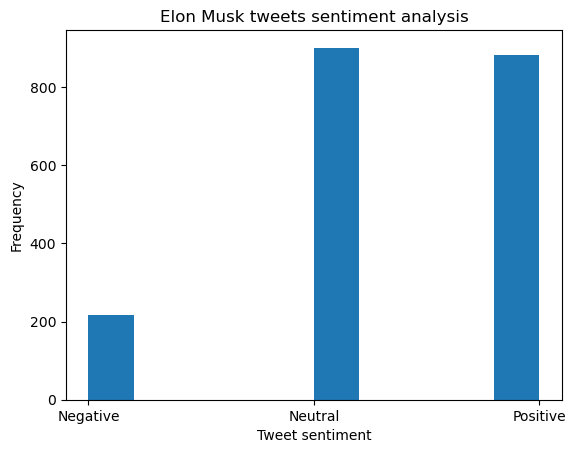

In [12]:
# Sentiments visualization

plt.hist(data=tweets_df, x='Sentiment')
plt.title('Elon Musk tweets sentiment analysis')
plt.xlabel('Tweet sentiment')
plt.ylabel('Frequency')
plt.show()

In [13]:
tweets_df['Sentiment'].value_counts()

Neutral     900
Positive    882
Negative    217
Name: Sentiment, dtype: int64

In [14]:
900 / tweets_df['Sentiment'].count()

0.4502251125562781

#### Conclusion

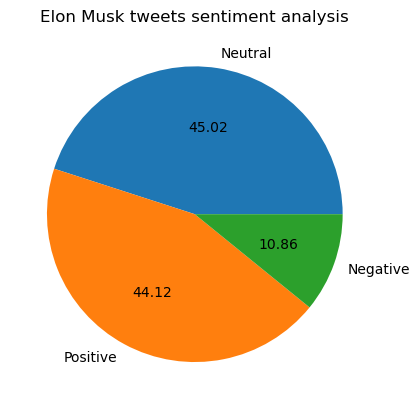

In [15]:
plt.pie(tweets_df['Sentiment'].value_counts(), labels=['Neutral', 'Positive', 'Negative'],
       autopct=lambda pct: round(pct, 2))
plt.title('Elon Musk tweets sentiment analysis')
plt.show()

### Problem statement - 2

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

Product considered: 
    
Product: Echo (4th Gen, Black) combo with Amazon Smart Plug
Brand: Amazong

#### Fetching data

In [16]:
# Fetching reviews from amazong site
import requests
from bs4 import BeautifulSoup

product = 'Echo (4th Gen, Black) combo with Amazon Smart Plug'
header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}

In [19]:
reviews = []
print('List of pages not responding - ')
for page in range(1, 25):
        url = 'https://www.amazon.in/Echo-Black-bundle-Amazon-Smart/product-reviews/B08K964H1C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
        url = url + f'&pageNumber={page}'
        response = requests.get(url, headers=header)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html')
            div = soup.find('div', id='cm_cr-review_list')
            rev = div.find_all('span', class_='a-size-base review-text review-text-content')
            for r in rev:
                reviews.append(r.text)
        else:
            print(f'Page no - {page}', response)

List of pages not responding - 
Page no - 2 <Response [404]>


AttributeError: 'NoneType' object has no attribute 'find_all'

In [20]:
filtered_reviews = []
for review in reviews:
    text = review.strip()
    filtered_reviews.append(text)
filtered_reviews

["Review:The Amazon Echo 4th Gen has truly revolutionized my smart home experience. This sleek and stylish device offers an impressive range of features that make it an absolute must-have for any tech-savvy individual.First and foremost, the sound quality is outstanding. The 4th Gen Echo delivers crisp, clear, and immersive audio that fills the room effortlessly. Whether I'm enjoying my favorite playlist or listening to a podcast, the sound is rich and vibrant, adding an extra layer of enjoyment to my daily routine.The voice assistant capabilities of this device are unparalleled. Alexa's intelligence and responsiveness are truly remarkable. From setting reminders and timers to controlling my smart home devices, Alexa flawlessly executes my commands, making my life easier and more convenient.The design of the Amazon Echo 4th Gen is another standout feature. Its modern, fabric-covered look seamlessly blends with any home decor. The compact size ensures that it doesn't take up much space,

In [21]:
# Coverting reviews to datafram
reviews_df = pd.DataFrame(filtered_reviews, columns=['Product Review'])
reviews_df

,Product Review
0,Review:The Amazon Echo 4th Gen has truly revol...
1,Awesome performance when listening to music or...
2,All in all its a very good product. The sound ...
3,Each and every notes of any sound is very very...
4,"Quality of sound is amazing, clear voice, musi..."
5,Very useful for music listeners.Great Sound
6,"Wanted to purchase this for a long time, but t..."
7,Much better response and connectivity with oth...
8,Such a great device if u afford to buy this ma...
9,The media could not be loaded.


#### Words tokenization

In [22]:
# Processing text

stop_words = pd.read_csv(r"D:\Education\Data science\Assignments\11 Text mining\stop.txt")

def data_processing(text):
    # Converting text to lower case
    text = text.lower()
    
    # Removing taggings and web addressess
    text = re.sub(r"https\S+|www\S+https\S+",'',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|#','', text)
    text = re.sub(r'[^\w\s]','',text)
    
    # Tokenization
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in list(stop_words)]
    
    return " ".join(filtered)

reviews_df['Product Review'] = reviews_df['Product Review'].apply(data_processing)
reviews_df.head()

,Product Review
0,reviewthe amazon echo 4th gen has truly revolu...
1,awesome performance when listening to music or...
2,all in all its very good product the sound qua...
3,each and every notes of any sound is very very...
4,quality of sound is amazing clear voice music ...


#### Sentiments based on afinn

In [23]:
#Sentiment analysis using afinn
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [24]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.

nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [25]:
# Adding sentiment
def sentiment(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    elif polarity > 0:
        return 'Positive'

In [26]:
# Reviews wise emotion value
reviews_df['Sentiment value'] = reviews_df['Product Review'].apply(calculate_sentiment)
reviews_df['Emotion'] = reviews_df['Sentiment value'].apply(sentiment)

In [27]:
reviews_df

,Product Review,Sentiment value,Emotion
0,reviewthe amazon echo 4th gen has truly revolu...,35,Positive
1,awesome performance when listening to music or...,6,Positive
2,all in all its very good product the sound qua...,1,Positive
3,each and every notes of any sound is very very...,6,Positive
4,quality of sound is amazing clear voice music ...,14,Positive
5,very useful for music listenersgreat sound,2,Positive
6,wanted to purchase this for long time but the ...,-1,Negative
7,much better response and connectivity with oth...,0,Neutral
8,such great device if u afford to buy this magi...,5,Positive
9,the media could not be loaded,0,Neutral


In [28]:
# Overall review of product
print('Overall review of product: ', product)
value = reviews_df['Sentiment value'].mean()
if value > 0:
    print(f'Sentiment value: {value} and Emotions of users: Positive.')
elif value == 0:
    print(f'Sentiment value: {value} and Emotions of users: Neutral.')
elif value < 0:
    print(f'Sentiment value: {value} and Emotions of users: Negative.')
else:
    print('None')    

Overall review of product:  Echo (4th Gen, Black) combo with Amazon Smart Plug
Sentiment value: 6.8 and Emotions of users: Positive.


#### Visualization

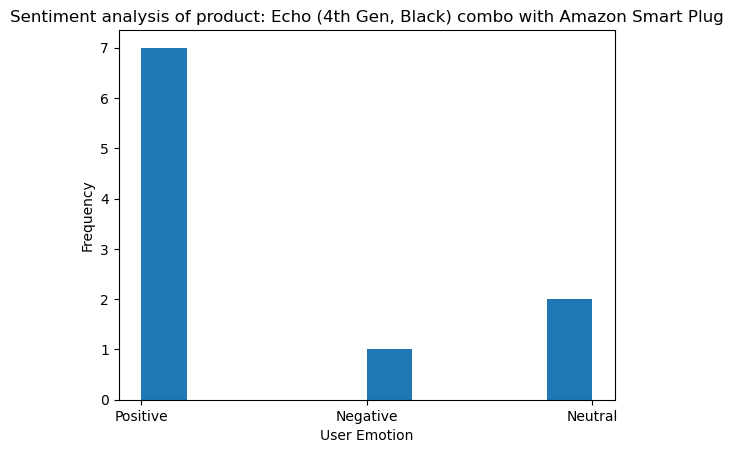

In [29]:
# Visualisation of Emotions
plt.hist(data=reviews_df, x='Emotion')
plt.title(f'Sentiment analysis of product: {product}')
plt.xlabel('User Emotion')
plt.ylabel('Frequency')
plt.show()

In [30]:
reviews_df['Emotion'].value_counts()

Positive    7
Neutral     2
Negative    1
Name: Emotion, dtype: int64

#### Conclusion

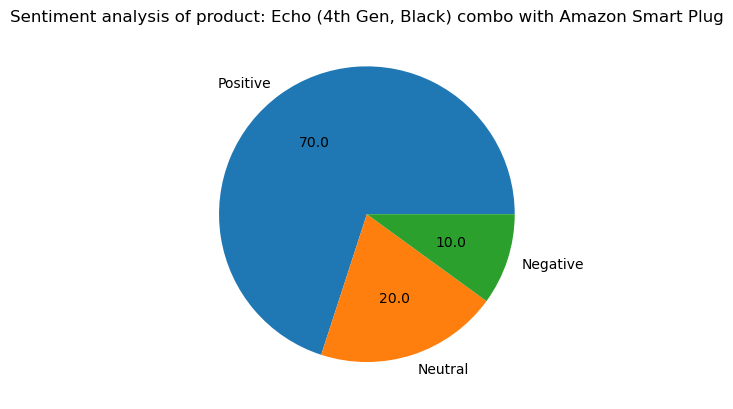

In [31]:
plt.pie(x=reviews_df['Emotion'].value_counts(), data=reviews_df['Emotion'], 
        labels=['Positive', 'Neutral', 'Negative'], autopct=lambda pct: round(pct, 2)) 
plt.title(f'Sentiment analysis of product: {product}')
plt.show()